In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import konlpy.tag as twitter

%matplotlib inline
plt.rc('font', family='Malgun Gothic')

from wordcloud import WordCloud
from konlpy.tag import Twitter
from ckonlpy.tag import Twitter
from konlpy.tag import Okt
from collections import Counter
import re
import numpy as np
from PIL import Image

In [2]:
path = r'C:/Users/user/Desktop/플젝용_데이터/설문조사/'

df_이용자 = pd.read_csv(path + '이용자_최종본.csv', encoding = 'CP949')
df_운전자 = pd.read_csv(path + '운전자_최종본.csv', encoding = 'CP949')
df_보행자 = pd.read_csv(path + '보행자_최종본.csv', encoding = 'CP949')

In [3]:
df1 = pd.concat([df_이용자, df_운전자])

In [4]:
df = pd.concat([df1, df_보행자])
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', '작성일시', '성별', '연령', '면허소지여부', '면허취득기간',
       '무면허이용', 'PM실제이용기간', 'PM얼마나자주', '평균주행시간', 'PM이용목적', 'PM사고', 'PM사고횟수',
       'PM사고원인', 'PM사고위치', 'PM아차사고', 'PM아차사고횟수', 'PM아차사고원인', 'PM아차사고위치',
       'PM주이용도로', 'PM주이용도로_이유', 'PM주이용도로_반대이유', 'PM개선사항', 'PM전용도로찬/반',
       '전용도로찬/반_이유', '전용도로위치', '전용도로위치_이유', '추가의견', 'PM사고경험', '주이용차종',
       '실제운전기간', '1주일 운전횟수', '1년평균주행거리', '운전목적', 'PM이용도로', 'PM이용도로_이유', '빈도 수',
       '몇일외출', '보행시간', '외출목적'],
      dtype='object')

In [5]:
df_찬성 = df.loc[df['PM전용도로찬/반'] == '찬성']['전용도로찬/반_이유']
df_반대 = df.loc[df['PM전용도로찬/반'] == '반대']['전용도로찬/반_이유']

In [6]:
mask_path = "C:/Users/user/Desktop/WordCloud 마스크/"
찬성_mask = np.array(Image.open(mask_path + '찬성.png'))
반대_mask = np.array(Image.open(mask_path + '반대.png'))
보도_mask = np.array(Image.open(mask_path + '보도.png'))
차도_mask = np.array(Image.open(mask_path + '차도.png'))

In [7]:
name = "찬성"
text = df_찬성
text = text.astype('str')
text =''.join(text)
colormap = "Purples"

twitter = Twitter()
        
twitter.add_dictionary('자전거전용도로', 'Noun')
twitter.add_dictionary('PM전용도로', 'Noun')
twitter.add_dictionary('이동수단', 'Noun')
twitter.add_dictionary('필요', 'Noun')
    
text_file = twitter.nouns(text)

# text_text_file = []
# for i in text_file:
#     if len(i) == 1:
#         continue
#     else:
#         text_text_file.append(i)
    
stop_word = ["굳이", "같다", "함","것", "가", ".","이", "이용","생각", "을","다", "에","한", "와"]
    #사용하지 않을 단어 또는 문장 추가
line = [i for i in text_file if i not in stop_word]

tags = Counter(line).most_common()
print(tags)


wc = WordCloud(font_path='C:/Windows/Fonts/HMFMMUEX.TTC',background_color="black",colormap = colormap, 
                  width=3000, height=2000), mask = 찬성_mask)
cloud = wc.generate_from_frequencies(dict(tags))

plt.imshow(cloud) 
plt.axis('off') 
plt.show()
cloud.to_file(f'C:/Users/user/Desktop/워드클라우드/전체/{name}_{colormap}.jpg')

SyntaxError: cannot assign to function call (Temp/ipykernel_16524/390980756.py, line 31)

In [ ]:
name = "반대"
colormap = "Purples"
text = df_반대
text = text.astype('str')
text =''.join(text)


twitter = Twitter()
        
twitter.add_dictionary('자전거전용도로', 'Noun')
twitter.add_dictionary('PM전용도로', 'Noun')
twitter.add_dictionary('이동수단', 'Noun')
twitter.add_dictionary('필요', 'Noun')
    
text_file = twitter.nouns(text)

# text_text_file = []
# for i in text_file:
#     if len(i) == 1:
#         continue
#     else:
#         text_text_file.append(i)
    
stop_word = ["굳이", "같다", "함","것", "가", ".","이", "이용","생각", "을","다", "에","한", "와"]
    #사용하지 않을 단어 또는 문장 추가
line = [i for i in text_file if i not in stop_word]

tags = Counter(line).most_common()
print(tags)


wc = WordCloud(font_path='C:/Windows/Fonts/HMFMMUEX.TTC',background_color="Black",colormap = colormap, 
                  width=3000, height=2000, mask = 반대_mask)
cloud = wc.generate_from_frequencies(dict(tags))

plt.imshow(cloud) 
plt.axis('off') 
plt.show()
cloud.to_file(f'C:/Users/user/Desktop/워드클라우드/전체/{name}_{colormap}.jpg')

In [8]:
전체위치 = pd.DataFrame(df['전용도로위치'].value_counts())
전체위치['비율'] = 전체위치['전용도로위치'] / sum(전체위치['전용도로위치']) * 100 
전체위치

,전용도로위치,비율
보도(인도),155,44.159544
차도,153,43.589744
기타,23,6.552707
모르겠다,10,2.849003
잘 모르겠음,4,1.139601
자전거도로,3,0.854701
자전거 전용도로,3,0.854701


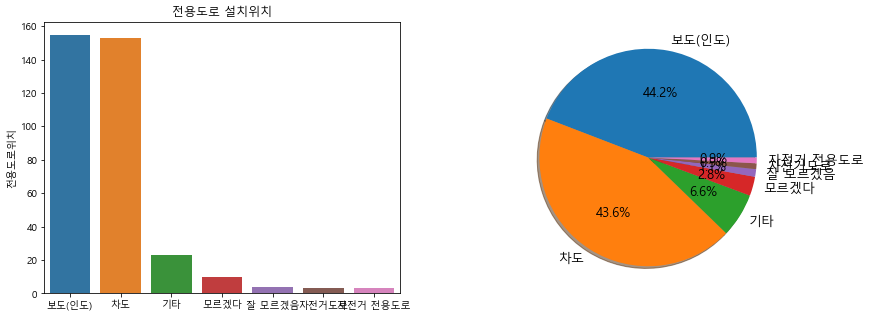

In [9]:
fig = plt.figure(figsize = (14,5))

ax1 = fig.add_subplot(1,2,1)
ax1 = sns.barplot(x=전체위치.index, y='전용도로위치', data = 전체위치)
ax1 = plt.title('전용도로 설치위치')

ax2 = fig.add_subplot(1,2,2)
ax2 = plt.pie(전체위치['비율'], labels = 전체위치.index,
              autopct="%1.1f%%", shadow = True,
             textprops={'fontsize': 13})

In [10]:
df.loc[df['전용도로위치'] == '모르겠다', '전용도로위치'] = '잘 모르겠다'
df.loc[df['전용도로위치'] == '잘 모르겠음', '전용도로위치'] = '잘 모르겠다'
df.loc[df['전용도로위치'] == '자전거도로', '전용도로위치'] = '자전거 전용도로'

In [11]:
df_보도 = df.loc[df['전용도로위치'] == '보도(인도)']['전용도로위치_이유']
df_차도 = df.loc[df['전용도로위치'] == '차도']['전용도로위치_이유']

C:\Users\user\anaconda3\lib\site-packages\konlpy\tag\_okt.py:17: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


[('차도', 62), ('위험', 30), ('자전거', 18), ('도로', 18), ('사고', 13), ('때문', 13), ('인도', 12), ('보도', 11), ('전용', 10), ('안전', 10), ('더', 8), ('차', 8), ('설치', 7), ('차량', 6), ('다차', 5), ('위험성', 5), ('현재', 5), ('속도', 5), ('이용자', 4), ('수', 4), ('안', 4), ('기', 4), ('지기', 4), ('시', 4), ('경우', 4), ('과함', 4), ('옆', 4), ('적', 3), ('통행', 3), ('운전', 3), ('중', 3), ('등', 3), ('정도', 3), ('고생', 3), ('방해', 3), ('피해', 3), ('설', 3), ('치하', 3), ('위', 3), ('개념', 3), ('교통', 3), ('날', 2), ('생기', 2), ('대한', 2), ('이유', 2), ('임도', 2), ('맘껏', 2), ('달리', 2), ('움', 2), ('가능', 2), ('보장', 2), ('역시', 2), ('포화상태', 2), ('줄', 2), ('이기', 2), ('전하', 2), ('자동차', 2), ('접촉', 2), ('보임', 2), ('미숙', 2), ('발생', 2), ('부상', 2), ('것임', 2), ('너', 2), ('무위', 2), ('부', 2), ('족하', 2), ('합', 2), ('운전자', 2), ('사용', 2), ('운행', 2), ('킥', 2), ('보드', 2), ('수단', 2), ('요', 2), ('서로', 2), ('은', 2), ('그나', 2), ('마', 2), ('가장', 2), ('유력', 2), ('처럼', 2), ('차로', 2), ('분류', 2), ('안전성', 2), ('면', 2), ('뒤', 2), ('자리', 2), ('잡고', 2), ('불편', 2), ('해지', 2), ('쪽'

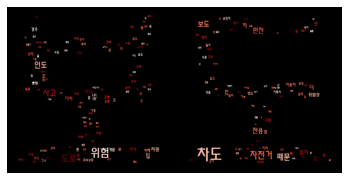

In [12]:
name = "보도"
colormap = "Reds"
text = df_보도
text = text.astype('str')
text =''.join(text)


twitter = Twitter()
        
twitter.add_dictionary('자전거전용도로', 'Noun')
twitter.add_dictionary('PM전용도로', 'Noun')
twitter.add_dictionary('이동수단', 'Noun')
twitter.add_dictionary('필요', 'Noun')
    
text_file = twitter.nouns(text)

# text_text_file = []
# for i in text_file:
#     if len(i) == 1:
#         continue
#     else:
#         text_text_file.append(i)
    
stop_word = ["굳이", "같다", "함","것", "가", ".","이", "이용","생각", "을","다", "에","한", "와"]
    #사용하지 않을 단어 또는 문장 추가
line = [i for i in text_file if i not in stop_word]

tags = Counter(line).most_common()
print(tags)


wc = WordCloud(font_path='C:/Windows/Fonts/HMFMMUEX.TTC',background_color="Black",colormap = colormap, 
                  width=3000, height=2000, mask = 보도_mask)
cloud = wc.generate_from_frequencies(dict(tags))

plt.imshow(cloud) 
plt.axis('off') 
plt.show()
cloud.to_file(f'C:/Users/user/Desktop/워드클라우드/전체/{name}_{colormap}.jpg')

[('인도', 47), ('차도', 30), ('때문', 28), ('위험', 20), ('보행자', 20), ('도로', 19), ('사람', 18), ('자전거', 17), ('사고', 17), ('속도', 15), ('설치', 14), ('더', 12), ('안전', 11), ('기', 9), ('차', 8), ('전용', 8), ('운행', 7), ('설', 7), ('치하', 7), ('경우', 7), ('기계', 6), ('수', 6), ('안', 6), ('전하', 6), ('위협', 6), ('보도', 5), ('적', 5), ('도', 5), ('때', 5), ('우선', 5), ('사람과', 5), ('운전자', 5), ('도로로', 5), ('공간', 4), ('듯', 4), ('곳', 4), ('안전성', 4), ('시', 4), ('날', 4), ('표시', 4), ('무조건', 4), ('보행', 4), ('관련', 4), ('위해', 4), ('게', 4), ('길이', 4), ('빨', 4), ('라서', 4), ('면', 4), ('이용자', 4), ('쪽', 3), ('사이', 3), ('조금', 3), ('이동수단', 3), ('옆', 3), ('차이', 3), ('또한', 3), ('인식', 3), ('더라도', 3), ('줄', 3), ('서인도', 3), ('및', 3), ('충돌', 3), ('개인', 3), ('위험성', 3), ('자리', 2), ('다차', 2), ('다인', 2), ('분류', 2), ('이기', 2), ('상동', 2), ('각', 2), ('차보', 2), ('오토바이', 2), ('처럼', 2), ('발생', 2), ('아인', 2), ('어린이', 2), ('노인', 2), ('임산부', 2), ('등', 2), ('약자', 2), ('법률', 2), ('이루', 2), ('어졌던', 2), ('논의', 2), ('알', 2), ('보시', 2), ('무엇', 2), ('인지', 2), (

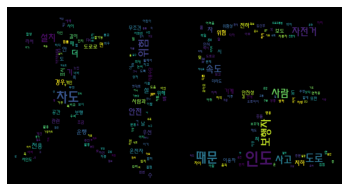

In [13]:
name = "차도"
text = df_차도
text = text.astype('str')
text =''.join(text)


twitter = Twitter()
        
twitter.add_dictionary('자전거전용도로', 'Noun')
twitter.add_dictionary('PM전용도로', 'Noun')
twitter.add_dictionary('이동수단', 'Noun')
twitter.add_dictionary('필요', 'Noun')
    
text_file = twitter.nouns(text)

# text_text_file = []
# for i in text_file:
#     if len(i) == 1:
#         continue
#     else:
#         text_text_file.append(i)
    
stop_word = ["굳이", "같다", "함","것", "가", ".","이", "이용","생각", "을","다", "에","한", "와"]
    #사용하지 않을 단어 또는 문장 추가
line = [i for i in text_file if i not in stop_word]

tags = Counter(line).most_common()
print(tags)

# colormap = []
# for i in range(len(tags)):
#     if i <= 30:
#         color.append('red')
#     else:
#         color.append('blue')

wc = WordCloud(font_path='C:/Windows/Fonts/HMFMMUEX.TTC',background_color="Black", max_words = 2000, 
                  width=3000, height=2000, mask = 차도_mask)
cloud = wc.generate_from_frequencies(dict(tags))

plt.imshow(cloud) 
plt.axis('off') 
plt.show()
cloud.to_file(f'C:/Users/user/Desktop/워드클라우드/전체/{name}_{colormap}.jpg')

#### 사고경험 유무의 차이

In [14]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', '작성일시', '성별', '연령', '면허소지여부', '면허취득기간',
       '무면허이용', 'PM실제이용기간', 'PM얼마나자주', '평균주행시간', 'PM이용목적', 'PM사고', 'PM사고횟수',
       'PM사고원인', 'PM사고위치', 'PM아차사고', 'PM아차사고횟수', 'PM아차사고원인', 'PM아차사고위치',
       'PM주이용도로', 'PM주이용도로_이유', 'PM주이용도로_반대이유', 'PM개선사항', 'PM전용도로찬/반',
       '전용도로찬/반_이유', '전용도로위치', '전용도로위치_이유', '추가의견', 'PM사고경험', '주이용차종',
       '실제운전기간', '1주일 운전횟수', '1년평균주행거리', '운전목적', 'PM이용도로', 'PM이용도로_이유', '빈도 수',
       '몇일외출', '보행시간', '외출목적'],
      dtype='object')

In [15]:
df.loc[df['PM사고'] == '예']

,Unnamed: 0,Unnamed: 0.1,작성일시,성별,연령,면허소지여부,면허취득기간,무면허이용,PM실제이용기간,PM얼마나자주,...,실제운전기간,1주일 운전횟수,1년평균주행거리,운전목적,PM이용도로,PM이용도로_이유,빈도 수,몇일외출,보행시간,외출목적
29,29,41,12-2-2021 10:29:48,남자,30대,예,13.0,예,1년 이상 ~ 3년 미만,주 1 ~ 2회,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32,32,46,12-2-2021 11:14:22,여자,20대,예,4.0,아니오,6개월 이상 ~ 1년 미만,매일,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38,38,52,12-2-2021 14:04:45,여자,20대,예,3.0,아니오,1개월 미만,주 1회 미만,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
43,43,58,12-7-2021 15:40:07,남자,20대,아니오,0.0,예,1년 이상 ~ 3년 미만,주 3 ~ 4회,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
58,58,81,12-8-2021 19:22:33,남자,20대,예,5.0,아니오,1개월 미만,주 1회 미만,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59,59,82,12-8-2021 19:49:49,여자,20대,예,2.0,아니오,1년 이상 ~ 3년 미만,주 1회 미만,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61,61,85,12-8-2021 22:42:47,남자,20대,예,10.0,아니오,1년 이상 ~ 3년 미만,주 1회 미만,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
73,73,99,12-8-2021 19:49:49,여자,20대,예,2.0,아니오,1년 이상 ~ 3년 미만,주 1회 미만,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
74,74,100,12-8-2021 22:42:47,남자,20대,예,10.0,아니오,1년 이상 ~ 3년 미만,주 1회 미만,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18,18,NaN,2021-12-10 10:37:39.543000,남자,30,NaN,12.0,NaN,NaN,NaN,...,11.0,5~6회,1만km 미만,출퇴근용,차도,보행자에게도 위협,1.0,NaN,NaN,NaN


In [16]:
df.loc[df['PM아차사고'] == '예']

,Unnamed: 0,Unnamed: 0.1,작성일시,성별,연령,면허소지여부,면허취득기간,무면허이용,PM실제이용기간,PM얼마나자주,...,실제운전기간,1주일 운전횟수,1년평균주행거리,운전목적,PM이용도로,PM이용도로_이유,빈도 수,몇일외출,보행시간,외출목적
0,0,1,12-1-2021 17:48:49,남자,20대,예,5.0,예,6개월 이상 ~ 1년 미만,주 1회 미만,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,6,12-1-2021 23:03:51,여자,20대,예,5.0,아니오,1개월 미만,주 1회 미만,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15,15,22,12-2-2021 0:00:52,남자,20대,아니오,0.0,예,1년 이상 ~ 3년 미만,주 1회 미만,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,17,24,12-2-2021 0:33:22,남자,20대,예,7.0,아니오,6개월 이상 ~ 1년 미만,주 1회 미만,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18,18,26,12-2-2021 1:42:04,남자,30대,아니오,0.0,예,1개월 미만,주 1 ~ 2회,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,114,NaN,NaN,남자,25,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,자전거 전용도로,PM이용자들 보면 속도가 빠르고 수동으로 움직이는 자전거도 따로 자전거도로가 있기 ...,NaN,1~2회,0 ~ 20분 미만,등하교
111,115,NaN,NaN,남자,32,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,차도,다른것과 섞여 타기엔 너무 독자적으로 위험함,NaN,5~6회,20~40분 미만,출퇴근
112,116,NaN,NaN,남자,32,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,자전거 전용도로,도로주행을 하나 면허를 취득하기만한 상태라 도로 흐름을 모른다,NaN,매일,0 ~ 20분 미만,출퇴근
115,119,NaN,NaN,남자,27,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,자전거 전용도로,전동 킥보드가 차도운행한다면 제2의오토바이 처럼될 것 같습니다,NaN,5~6회,20~40분 미만,출퇴근


In [17]:
df['PM사고경험'] = 0 
df.loc[df['PM사고'] == '예', 'PM사고경험'] = 1
df.loc[df['PM아차사고'] == '예', 'PM사고경험'] = 1

In [18]:
사고경험 = pd.DataFrame(df['PM사고경험'].value_counts())
사고경험['비율'] = 사고경험['PM사고경험'] / sum(사고경험['PM사고경험']) * 100
사고경험

,PM사고경험,비율
0,239,62.894737
1,141,37.105263


([<matplotlib.patches.Wedge at 0x1f367626670>,
 [Text(-0.43352186988895147, 1.0109692321371542, ''),
  Text(0.43352186988895136, -1.0109692321371544, '')],
 [Text(-0.2364664744848826, 0.5514377629839022, '62.9%'),
  Text(0.2364664744848825, -0.5514377629839023, '37.1%')])

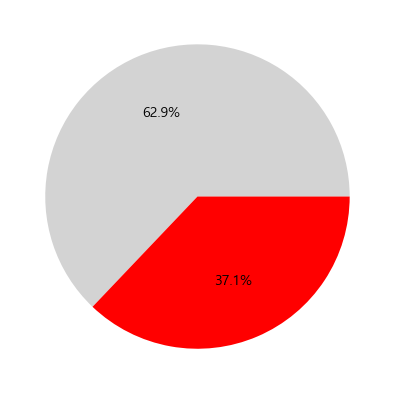

In [20]:
plt.figure(figsize = (7,7))
plt.pie(사고경험['비율'], colors = ['lightgrey', 'red'], autopct = '%1.1f%%', textprops = {'fontsize': 14})

### 결론

* 이용자, 운전자, 보행자별로 인식의 차이가 존재한다. 
* PM전용도로설치와 관련하여서는 모두 찬성하는 입장이다.
* 그러나, 설치위치 관련하여서는 운전자는 보도가, 보행자는 차도가 높은 것으로 나타났음.
* 이는, 자신의 구역에 침범하지 못하도록 하는 것으로 보임

### 한계점

* 설문조사의 표본이 고르게 분포하지 못하여서 일반화의 어려움이 있음.
* 이용자, 운전자, 보행자를 명확하게 구분하기에 어려움이 있었음.

### 제언

* 더 많은 표본을 활용하여 PM관련된 정책이 마련되기를 바람.

In [29]:
path = r'C:/Users/user/Desktop/플젝용_데이터/설문조사/'

df_이용자 = pd.read_csv(path + '이용자_최종본.csv', encoding = 'CP949')
df_운전자 = pd.read_csv(path + '운전자_최종본.csv', encoding = 'CP949')
df_보행자 = pd.read_csv(path + '보행자_최종본.csv', encoding = 'CP949')

In [30]:
pm개선사항 = []
pm개선사항 = df_보행자['PM개선사항'].apply(lambda x : x.split(',')[0]).str.strip()
pm개선사항 = pd.DataFrame(pm개선사항.value_counts().reset_index())

pm개선사항1 = []
pm개선사항1 = df_보행자['PM개선사항'].apply(lambda x : x.split(',')[1]).str.strip()
pm개선사항1 = pd.DataFrame(pm개선사항1.value_counts().reset_index())

df_pm개선사항 = pd.merge(pm개선사항, pm개선사항1, how = 'outer')
df_pm개선사항 = df_pm개선사항.rename({'index': '목록'},axis = 'columns')
df_pm개선사항

,목록,PM개선사항
0,도로/보도 환경 개선,38
1,사고시 보험 문제 개선,36
2,사고시 보험문제 개선,35
3,운영방식 개선(방치 PM 즉시수거 등),4
4,운영방식 개선 (방치 PM 즉시수거 등),3
5,편리성 증대(헬멧 미착용 등),2
6,사고시 보험 문제 개선,1
7,도로/보도 환경 개선,45
8,법 제도 개선(PM 정기점검 등),37
9,운영방식 개선(방치 PM 즉시수거 등),10


In [31]:
#### 개선사항 
df_pm개선사항.loc[df_pm개선사항['목록'] == '사고시 보험문제  개선', '목록'] = '사고시 보험 문제 개선'
df_pm개선사항.loc[df_pm개선사항['목록'] == 'PM 장비 개선 (바람 가림막 등)', '목록'] = 'PM 장비개선(바람 가림막 등)'
df_pm개선사항.loc[df_pm개선사항['목록'] == '운영방식 개선(방치 PM 즉시 수거)', '목록'] = '운영방식 개선 (방치 PM 즉시수거 등)'
df_pm개선사항.loc[df_pm개선사항['목록'] == '편리성 증대(헬멧 미착용 등)', '목록'] = '편리성 증대(헬맷 미착용 등)'

In [32]:
df_pm개선사항.groupby('목록')['PM개선사항'].sum()

목록
대중교통 환승 연계                10
도로/보도 환경 개선               83
법 제도 개선(PM 정기점검 등)        37
사고시 보험 문제  개선              1
사고시 보험 문제 개선              36
사고시 보험문제 개선               35
운영방식 개선 (방치 PM 즉시수거 등)     5
운영방식 개선(방치 PM 즉시수거 등)     14
운행자의 운행수칙 숙지상태             2
편리성 증대(헬맷 미착용 등)          15
Name: PM개선사항, dtype: int64

In [33]:
df_pm개선사항.loc[df_pm개선사항['목록'] == '운영방식 개선 (방치 PM 즉시수거 등)', '목록'] = '운영방식 개선(방치 PM 즉시수거 등)'
df_pm개선사항.loc[df_pm개선사항['목록'] == '사고시 보험문제  개선', '목록'] = '사고시 보험문제 개선'
df_pm개선사항.loc[df_pm개선사항['목록'] == '사고시 보험문제 개선 ', '목록'] = '사고시 보험문제 개선'
df_pm개선사항.loc[df_pm개선사항['목록'] == '사고시 보험 문제 개선', '목록'] = '사고시 보험문제 개선'
df_pm개선사항.loc[df_pm개선사항['목록'] == '사고시 보험 문제  개선', '목록'] = '사고시 보험문제 개선'
df_pm개선사항.loc[df_pm개선사항['목록'] == '편리성 증대(헬맷 미착용 등)', '목록'] = '편리성 증대(헬멧 미착용 등)'

In [34]:
df_pm개선사항_보행자 = df_pm개선사항.groupby('목록')['PM개선사항'].sum()
df_pm개선사항_보행자

목록
대중교통 환승 연계               10
도로/보도 환경 개선              83
법 제도 개선(PM 정기점검 등)       37
사고시 보험문제 개선              72
운영방식 개선(방치 PM 즉시수거 등)    19
운행자의 운행수칙 숙지상태            2
편리성 증대(헬멧 미착용 등)         15
Name: PM개선사항, dtype: int64

In [37]:
## PM개선사항에서 'nan'값만 제거 : 리스트에서 nan값 제거
mylist = [str(x) for x in df_운전자['PM개선사항']]
print(mylist)
PM개선사항_결측제거 = [x for x in mylist if x != 'nan']
print(PM개선사항_결측제거)
PM개선사항_결측제거= pd.DataFrame(PM개선사항_결측제거).reset_index()
PM개선사항 = pd.DataFrame(PM개선사항_결측제거[0].apply(lambda x : x.split(",")[0]))
PM개선사항.columns = ['항목']
PM개선사항 = pd.DataFrame(PM개선사항['항목'].value_counts()).reset_index()
PM개선사항
PM개선사항1 = pd.DataFrame(PM개선사항_결측제거[0].apply(lambda x : x.split(",")[1]))
PM개선사항1
PM개선사항1.columns = ['항목']
PM개선사항1 = pd.DataFrame(PM개선사항1['항목'].value_counts()).reset_index()
df_pm개선사항 = pd.merge(PM개선사항, PM개선사항1, how = 'outer', on='index')
df_pm개선사항 = df_pm개선사항.fillna(0) 
df_pm개선사항['합계'] = df_pm개선사항['항목_x'] + df_pm개선사항['항목_y']
df_pm개선사항
df_pm개선사항['index'] = df_pm개선사항['index'].str.strip()
개선사항 = pd.DataFrame(df_pm개선사항.groupby('index')['합계'].sum()).reset_index()
개선사항
개선사항.loc[개선사항['index'] == '1', 'index'] = '사고시 보험문제 개선'
개선사항.loc[개선사항['index'] == '2', 'index'] = '도로/보도 환경 개선'
개선사항.loc[개선사항['index'] == '3', 'index'] = '운영방식 개선'
개선사항.loc[개선사항['index'] == '4', 'index'] = '편리성 증대'
개선사항.loc[개선사항['index'] == '5', 'index'] = 'PM 장비개선'
개선사항.loc[개선사항['index'] == '6', 'index'] = '대중교통 환승 연계'
개선사항.loc[개선사항['index'] == '7', 'index'] = '법 제도 개선'
개선사항.loc[개선사항['index'] == '8', 'index'] = '기타'
개선사항_운전자 = 개선사항

['2, 7', 'nan', '2, 6', '1, 2', '1, 2', '1, 5', '1, 2', '7, 2', '2, 3', 'nan', '1, 3', '1, 2', '2, 3', '1, 2', '1, 2', '1, 3', '5, 7', '2, 4', '1, 3', '2, 3', '1, 2', '1,2', '3,4', '2,3', '1,2', '2,7', '2,7', '1,2', 'nan', '1,2', '1,4', '2,3', '1,2', '2,7', '1,2', '2,3', '1,4', '3,4', '2,4', '1,2', '2,7', '2,5', '1,2', '1,2', '2,3', '2,6', '2,7', '1,2', '2,4', '2,3', '1,2', '1,2', '1,2', '1,2', '1,2', '1,2', '2,7', '1,2', '2,5', '2,4', '2,3', '2,7', '2,3', '2,4', '1,2', '1,2', '3,8', '1,3', '2,5', '2,3', '2,6', '1,2', '3,7', '2,6', '2,8', '1,2', '2,4', '2,5', '2,7', '1,2', '1,2', '1,3', '2,7', '2,7', '1,2', '2,3', '2,7', '2,3', '1,2', '1,4', '3,4', '2,4', '1,4', '1,7', '1,2', '2,6', '2,5', '3,4', '2,6', '1,2', '2,4', '1,2', '1,2', '2,7', '1,3', '2,6', '2,5', '2,7', '2,6', '2,6', '1,2', 'nan', '1,3', '1,6', '1,2', 'nan', '1,2', '1,2', '1,3', '3,7', 'nan', 'nan', 'nan', '1,2', '1,2', '2,5', 'nan', '2,6', '4,7', 'nan', '6,7', '4,5', '2,3', '1,4', 'nan', 'nan', 'nan', '1,2', '2,6', '1,2', 

In [38]:
개선사항_운전자

,index,합계
0,사고시 보험문제 개선,66.0
1,도로/보도 환경 개선,107.0
2,운영방식 개선,33.0
3,편리성 증대,20.0
4,PM 장비개선,11.0
5,대중교통 환승 연계,15.0
6,법 제도 개선,22.0
7,기타,2.0


In [39]:
df_pm개선사항_보행자

목록
대중교통 환승 연계               10
도로/보도 환경 개선              83
법 제도 개선(PM 정기점검 등)       37
사고시 보험문제 개선              72
운영방식 개선(방치 PM 즉시수거 등)    19
운행자의 운행수칙 숙지상태            2
편리성 증대(헬멧 미착용 등)         15
Name: PM개선사항, dtype: int64

In [40]:
pm개선사항 = []
pm개선사항 = df_이용자['PM개선사항'].apply(lambda x : x.split(',')[0]).str.strip()
pm개선사항 = pd.DataFrame(pm개선사항.value_counts().reset_index())
pm개선사항1 = []
pm개선사항1 = df_이용자['PM개선사항'].apply(lambda x : x.split(',')[1]).str.strip()
pm개선사항1 = pd.DataFrame(pm개선사항1.value_counts().reset_index())
df_pm개선사항 = pd.concat([pm개선사항, pm개선사항1])
df_pm개선사항 = df_pm개선사항.rename({'index': '목록'},axis = 'columns')
df_pm개선사항
df_pm개선사항['목록'].unique()
df_pm개선사항.loc[df_pm개선사항['목록'] == '사고시 보험문제  개선', '목록'] = '사고시 보험 문제 개선'
df_pm개선사항.loc[df_pm개선사항['목록'] == 'PM 장비 개선 (바람 가림막 등)', '목록'] = 'PM 장비개선(바람 가림막 등)'
df_pm개선사항.loc[df_pm개선사항['목록'] == '운영방식 개선(방치 PM 즉시 수거)', '목록'] = '운영방식 개선 (방치 PM 즉시수거 등)'
df_pm개선사항.loc[df_pm개선사항['목록'] == '편리성 증대(헬멧 미착용 등)', '목록'] = '편리성 증대(헬맷 미착용 등)'
df_pm개선사항 = df_pm개선사항.groupby('목록').sum()

In [51]:
df_pm개선사항_이용자 = df_pm개선사항.reset_index()

In [52]:
df_pm개선사항_이용자
df_pm개선사항_보행자
개선사항_운전자

,목록,합계
0,사고시 보험문제 개선,66.0
1,도로/보도 환경 개선,107.0
2,운영방식 개선,33.0
3,편리성 증대,20.0
4,PM 장비개선,11.0
5,대중교통 환승 연계,15.0
6,법 제도 개선,22.0
7,기타,2.0


In [53]:
개선사항_보행자 = pd.DataFrame(df_pm개선사항_보행자).reset_index()
개선사항_보행자

,목록,PM개선사항
0,대중교통 환승 연계,10
1,도로/보도 환경 개선,83
2,법 제도 개선(PM 정기점검 등),37
3,사고시 보험문제 개선,72
4,운영방식 개선(방치 PM 즉시수거 등),19
5,운행자의 운행수칙 숙지상태,2
6,편리성 증대(헬멧 미착용 등),15


In [54]:
개선사항_운전자.columns = ['목록', '합계']

In [55]:
df_pm개선사항_이용자

,목록,PM개선사항
0,PM / 자전거 등 전용도로 개선,1
1,PM 장비개선(바람 가림막 등),18
2,대중교통 환승 연계,11
3,도로/보도 환경 개선,74
4,법 제도 개선(PM 정기점검 등),27
5,사고시 보험 문제 개선,55
6,운영방식 개선 (방치 PM 즉시수거 등),15
7,편리성 증대(헬맷 미착용 등),13


In [57]:
개선사항_이보 = pd.merge(df_pm개선사항_이용자, 개선사항_보행자, on = '목록', how = 'outer')

In [59]:
개선사항_최종 = pd.merge(개선사항_이보, 개선사항_운전자, on='목록', how='outer')
개선사항_최종

,목록,PM개선사항_x,PM개선사항_y,합계
0,PM / 자전거 등 전용도로 개선,1.0,NaN,NaN
1,PM 장비개선(바람 가림막 등),18.0,NaN,NaN
2,대중교통 환승 연계,11.0,10.0,15.0
3,도로/보도 환경 개선,74.0,83.0,107.0
4,법 제도 개선(PM 정기점검 등),27.0,37.0,NaN
5,사고시 보험 문제 개선,55.0,NaN,NaN
6,운영방식 개선 (방치 PM 즉시수거 등),15.0,NaN,NaN
7,편리성 증대(헬맷 미착용 등),13.0,NaN,NaN
8,사고시 보험문제 개선,NaN,72.0,66.0
9,운영방식 개선(방치 PM 즉시수거 등),NaN,19.0,NaN


In [64]:
개선사항_최종.loc[개선사항_최종['목록'] == '법 제도 개선', '목록'] = '법 제도 개선(PM 정기점검 등)'

In [68]:
개선사항_최종 = 개선사항_최종.fillna(0)
개선사항_최종.groupby('목록').sum()

,PM개선사항_x,PM개선사항_y,합계
목록,,,
PM / 자전거 등 전용도로 개선,1.0,0.0,0.0
PM 장비개선,0.0,0.0,11.0
PM 장비개선(바람 가림막 등),18.0,0.0,0.0
기타,0.0,0.0,2.0
대중교통 환승 연계,11.0,10.0,15.0
도로/보도 환경 개선,74.0,83.0,107.0
법 제도 개선(PM 정기점검 등),27.0,37.0,22.0
사고시 보험 문제 개선,55.0,0.0,0.0
사고시 보험문제 개선,0.0,72.0,66.0


In [71]:
개선사항_최종.loc[개선사항_최종['목록'] == '편리성 증대(헬맷 미착용 등)', '목록'] = '편리성 증대(헬멧 미착용 등)'
개선사항_최종.loc[개선사항_최종['목록'] == '운영방식 개선(방치 PM 즉시수거 등)', '목록'] = '운영방식 개선 (방치 PM 즉시수거 등)'
개선사항_최종.loc[개선사항_최종['목록'] == '사고시 보험 문제 개선', '목록'] = '사고시 보험문제 개선'

In [72]:
개선사항_최종.groupby('목록').sum()

,PM개선사항_x,PM개선사항_y,합계
목록,,,
PM / 자전거 등 전용도로 개선,1.0,0.0,0.0
PM 장비개선,0.0,0.0,11.0
PM 장비개선(바람 가림막 등),18.0,0.0,0.0
기타,0.0,0.0,2.0
대중교통 환승 연계,11.0,10.0,15.0
도로/보도 환경 개선,74.0,83.0,107.0
법 제도 개선(PM 정기점검 등),27.0,37.0,22.0
사고시 보험문제 개선,55.0,72.0,66.0
운영방식 개선,0.0,0.0,33.0


In [74]:
개선사항_최종.loc[개선사항_최종['목록'] == 'PM 장비개선', '목록'] = 'PM 장비개선(바람 가림막 등)'

In [75]:
개선사항_최종.groupby('목록').sum()

,PM개선사항_x,PM개선사항_y,합계
목록,,,
PM / 자전거 등 전용도로 개선,1.0,0.0,0.0
PM 장비개선(바람 가림막 등),18.0,0.0,11.0
기타,0.0,0.0,2.0
대중교통 환승 연계,11.0,10.0,15.0
도로/보도 환경 개선,74.0,83.0,107.0
법 제도 개선(PM 정기점검 등),27.0,37.0,22.0
사고시 보험문제 개선,55.0,72.0,66.0
운영방식 개선,0.0,0.0,33.0
운영방식 개선 (방치 PM 즉시수거 등),15.0,19.0,0.0


In [76]:
개선사항_최종.loc[개선사항_최종['목록'] == '운영방식 개선', '목록'] = '운영방식 개선 (방치 PM 즉시수거 등)'

In [77]:
개선사항_최종.groupby('목록').sum()

,PM개선사항_x,PM개선사항_y,합계
목록,,,
PM / 자전거 등 전용도로 개선,1.0,0.0,0.0
PM 장비개선(바람 가림막 등),18.0,0.0,11.0
기타,0.0,0.0,2.0
대중교통 환승 연계,11.0,10.0,15.0
도로/보도 환경 개선,74.0,83.0,107.0
법 제도 개선(PM 정기점검 등),27.0,37.0,22.0
사고시 보험문제 개선,55.0,72.0,66.0
운영방식 개선 (방치 PM 즉시수거 등),15.0,19.0,33.0
운행자의 운행수칙 숙지상태,0.0,2.0,0.0


In [78]:
개선사항_최종.loc[개선사항_최종['목록'] == '편리성 증대', '목록'] = '편리성 증대(헬멧 미착용 등)'

In [83]:
개선사항 = 개선사항_최종.groupby('목록').sum()
개선사항['총합계'] = 개선사항['PM개선사항_x'] + 개선사항['PM개선사항_y'] + 개선사항['합계']
개선사항 = 개선사항.reset_index()
개선사항 = 개선사항[['목록', '총합계']]

In [90]:
개선사항 = 개선사항.sort_values(by='총합계', ascending=False)
개선사항 = 개선사항[:6]

<AxesSubplot:xlabel='목록', ylabel='총합계'>

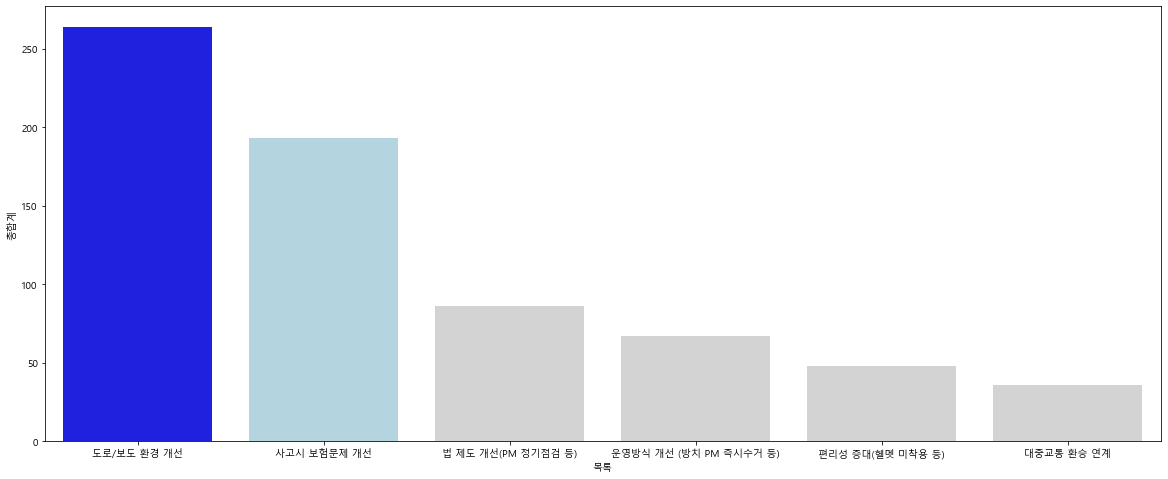

In [100]:
plt.figure(figsize=(20,8))
colors = ['blue', 'lightblue', 'lightgrey','lightgrey','lightgrey','lightgrey']
sns.barplot(x='목록', y='총합계', data = 개선사항, palette= colors)